In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

In [3]:
# downloading the train dataset
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# downloading the test dataset
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
image, label = next(iter(trainloader))

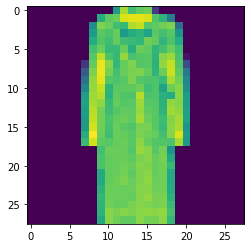

In [5]:
plt.imshow(image[1].numpy().squeeze())

In [6]:
label[1]

tensor(4)

In [7]:
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                    nn.Dropout(p=0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(p=0.2),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [8]:
epochs = 5
train_losses = []
test_losses = []

for epoch in range(epochs):
    running_loss = 0
    for image, label in trainloader:
        
        # flatten the images
        image = image.view(image.shape[0], -1)
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else: 
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            for test_images, test_labels in testloader:
                
                test_images = test_images.view(test_images.shape[0], -1)
                
                log_ps = model.forward(test_images)
                test_loss += criterion(log_ps, test_labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        model.train()
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print('Epoch: ', epoch)
        print('Training loss:', running_loss/len(trainloader))
        print('Test loss: ', test_loss/len(testloader))
        print('accuracy: ', accuracy/len(testloader))
        

Epoch:  0
Training loss: 0.6004362025939579
Test loss:  tensor(0.5061)
accuracy:  tensor(0.8175)
Epoch:  1
Training loss: 0.48605713890051283
Test loss:  tensor(0.4510)
accuracy:  tensor(0.8424)
Epoch:  2
Training loss: 0.4531940906000798
Test loss:  tensor(0.4211)
accuracy:  tensor(0.8457)
Epoch:  3
Training loss: 0.43556079303404927
Test loss:  tensor(0.4238)
accuracy:  tensor(0.8427)
Epoch:  4
Training loss: 0.41842313770101525
Test loss:  tensor(0.4341)
accuracy:  tensor(0.8516)


In [9]:
# Testing

img = image[6].view(1, 784)

In [10]:
ps = torch.exp(model(img))
ps = ps.data.numpy().squeeze()

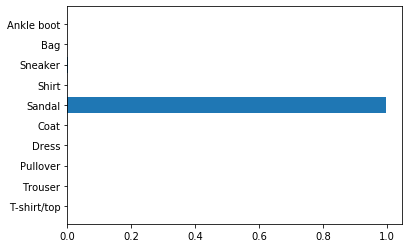

In [11]:
labels=['T-shirt/top',
           'Trouser',
           'Pullover',
           'Dress',
           'Coat',
           'Sandal',
           'Shirt',
           'Sneaker',
           'Bag',
           'Ankle boot']
fig, ax = plt.subplots()
ax.barh(np.arange(10), ps)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
plt.show()

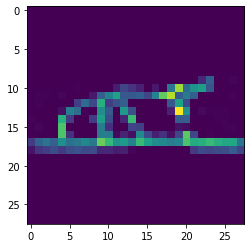

In [12]:
plt.imshow(img.resize_(1, 28, 28).numpy().squeeze())
plt.show()

In [13]:
# Measuring accuracy

test_images, test_labels = next(iter(testloader))


In [14]:
ps_test = torch.exp(model(test_images.view(test_images.shape[0], -1)))

In [15]:
top_p, top_class = ps_test.topk(1, dim=1)

In [16]:
accuracy = torch.mean(equals.type(torch.FloatTensor))

In [17]:
accuracy.item()

0.6875